In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.io as pio
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

# Plotly Library
* Plotly is an interactive library that includes various functions for creating data visualizations and dashboards compatible with the Python programming language.
* Using Plotly, interactive graphs can be easily shared with more than one person via a link.
* Plotly can be used by people without a technical background to create interactive graphs by uploading data and using the graphical user interface.
* As we will see in the following lessons, creating interactive graphs with Plotly is quite simple for those who are familiar with the terminology.

### Contents:
1. World University Rankings Dataset
2. Line Plot
3. Scatter Plot
4. Bar Plot
5. Pie Chart
6. Bubble Chart
7. Histogram
8. Box Plot
9. Pair Plot
10. Subplot
11. 3D Scatter Plot
12. World Map Plot

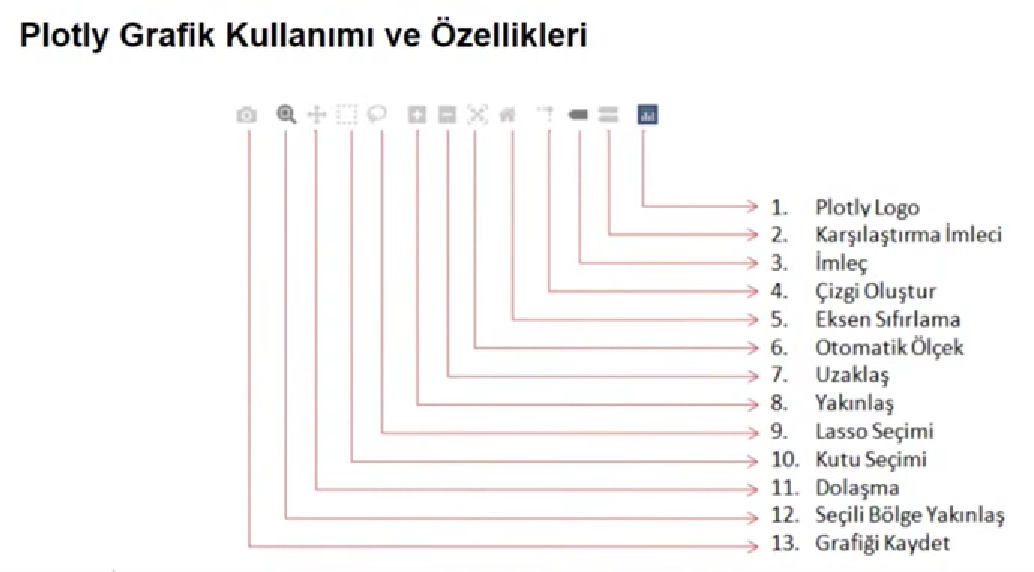

# World University Rankings Dataset

### In this section, we will work on a dataset that includes the rankings of universities around the world based on different criteria.
### The names and descriptions of the columns in the dataset are as follows:
1. world_rank - world ranking
2. university_name - university name
3. country - country where the university is located
4. teaching - teaching score
5. international - university score in terms of international students/staff
6. research - research score
7. citations - citation score
8. income - income score
9. total_score - total score
10. num_students - number of students
11. student_staff_ratio - student/staff ratio
12. international_students - ratio of international students
13. female_male_ratio - female to male student ratio
14. year - year of the ranking

In [2]:
os.chdir('....')
rank = pd.read_csv('University_Rankings.csv')

In [3]:
rank.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [4]:
rank.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

## Line Plot 

* A line plot is a type of chart that shows information as a series of data points connected by straight line segments.
* Line plots are generally used to visualize data values over a specified time interval - time series - and are drawn chronologically.
* They are also used to visualize measurements dependent on time.

## Scatter Plot

* Scatter plot is used to determine the relationship between two different variables.

In [5]:
df = rank.iloc[:100,:]

In [6]:
# plotyly styles
pio.templates.default = 'simple_white'

In [7]:
draw1 = go.Scatter(x = df.world_rank,
                  y = df.citations,
                  mode = 'lines+markers',
                  name = 'Citations',
                  marker = dict(color = 'rgba(78,78,250,0.85)'),
                  text = df.university_name)

draw2 = go.Scatter(x = df.world_rank,
                  y = df.research,
                  mode = 'lines+markers',
                  name = 'Research',
                  marker = dict(color = 'rgba(202,43,15,0.85)'),
                  text = df.university_name)

data = [draw1, draw2]
layout = dict(title = 'Citation and Teaching Scores of the Top 100 Universities in the World Ranking',
               xaxis = dict(title = 'World Rank', ticklen = 5, zeroline = False))
fig = dict(data=data, layout = layout)
plot(fig, filename = 'Citation and Research Scores with Line&Scatter.html')

'Citation and Research Scores with Line&Scatter.html'

## Bar Plot

In [15]:
data2011 = df[df.year == 2011].iloc[:5,:]

In [14]:
draw3 = go.Bar(x = data2014.university_name, 
               y = data2014.citations,
               name = 'Citations',
               marker = dict(color = 'rgba(255, 127, 40, 0.85)'),
               #base = dict(color = 'rgba(0, 0, 0)', width = 1.5),
               text = data2014.country)

draw4 = go.Bar(x = data2014.university_name, 
               y = data2014.research,
               name = 'Research',
               marker = dict(color = 'rgba(64, 10, 28, 0.5)'),
               #base = dict(color = 'rgba(0, 0, 0)', width = 1.5),
               text = data2014.country)

data_ = [draw3, draw4]
layout = go.Layout(barmode = 'group')
fig = go.Figure(data=data_, layout = layout)
plot(fig, filename = 'Citation and Research Scores with Bar.html')

'Citation and Research Scores with Bar.html'

## Pie Chart

* A pie chart is a visual representation tool used in descriptive statistics within the field of statistics to visually describe and summarize categorical data. It is prepared to show the proportional slices of categories within a circle.

In [16]:
data2011 = df[df.year == 2011].iloc[:8,:]

In [19]:
pie1 = data2011.num_students
pie1_list = [float(each.replace(',', '.')) for each in data2011.num_students]
labels = data2011.university_name

draw5 = go.Pie(labels = labels,
               values = pie1_list,
               hoverinfo = 'label+value+percent',
               textinfo = 'value+percent',
               textfont = dict(size = 8),
               rotation = 180,
               hole = 0.3,
               marker = dict(line = dict(color = '#000000', width = 1))               
              )
data_ = [draw5]
location = dict(title = 'Student Numbers and Ratio Scores of the Top 8 Universities in 2011',
                legend = dict(orientation = 'h')
               )
fig = dict(data = data_, layout = layout)
plot(fig, filename = 'Pie - Student Numbers')

'Pie - Student Numbers.html'

## Bubble Chart

"""data2011 = df[df.year == 2011].iloc[:20,:]
num_students = [float(each.replace(',', '.')) for each in data2011.num_students]
international_color = [each for each in data2011.international]

#Prepare data for plotting
data = [{'y': data2011.teaching,
         'x': data2011.world_rank,
         'mode': 'markers',
         'marker': {'color': 'continent',
                    'size': num_students,
                    'showscale': True},
         'text': data2011.university_name
}]

#Plot the data
plot(data, filename='Bubble Chart - Student Numbers')"""

## Histogram

## Box Plot

## Pair Plot

## Subplot

## 3D Scatter Plot

## World Map Plot